# Analyse de radiographies pulmonaires Covid-19

    *   Description du projet : 

Afin de faire le diagnostic des patients au Covid-19, l’analyse de radiographies pulmonaires est une possibilité à explorer pour détecter plus facilement les cas positifs. Si la classification par le biais du deep learning de telles données se révèle efficace pour détecter les cas positifs, alors cette méthode peut être utilisée dans les hôpitaux et cliniques quand on ne peut pas faire de test classique.

    *   Contexte & problématique :

Les tests PCR sont rapidement devenus le standard pour le diagnostic du COVID-19, notamment dans les grandes métropoles. Cependant, plusieurs limitations sont apparues au fil de leur utilisation. Leur disponibilité peut fluctuer en fonction de la demande, tandis que leur coût élevé (réactifs, équipements spécialisés, techniciens) et le délai d’obtention des résultats (entre 24 et 48 heures, voire plus) peuvent ralentir la prise en charge des patients. De plus, la sensibilité de ces tests, bien que globalement élevée, peut varier entre 71% et 98% selon le stade de la maladie ou la qualité du prélèvement, ce qui génère un nombre non négligeable de faux négatifs.

Face à ces contraintes, il apparaît essentiel de développer des solutions diagnostiques complémentaires ou alternatives. Celles-ci pourraient couvrir plusieurs besoins concrets : un triage rapide des patients en milieu hospitalier, une confirmation par second test pour les cas symptomatiques mais PCR négative, ou encore la nécessité d’obtenir un résultat immédiat, notamment pour les populations vulnérables comme les personnes âgées ou les patients atteints de comorbidités. Enfin, dans des contextes où les tests PCR ne sont pas disponibles, des outils alternatifs sont indispensables.

L’imagerie médicale apparaît comme une réponse efficace à ces problématiques. Grâce à sa large accessibilité dans la plupart des hôpitaux, son coût réduit et la rapidité des résultats (quelques minutes seulement), elle offre une solution pertinente. Deux modalités d’imagerie sont principalement utilisées aujourd’hui : la radiographie thoracique (CXR) et le scanner (CT scan).

Ce projet s’intéressera particulièrement à la radiographie thoracique, car, bien que moins sensible que le scanner, elle présente l’avantage d’être moins coûteuse, plus accessible et d’exposer les patients à une dose de radiation plus faible. 

L’objectif est d’améliorer les performances diagnostiques de la radiographie thoracique grâce à l’assistance du deep learning, afin de détecter les cas de COVID-19 de manière plus efficace et rapide.

    *   Notions clés :
    
1.	Analyse de radiographies pulmonaires Covid-19
	- Radiographies thoraciques (CXR) pour identifier des pathologies pulmonaires.
	- Anomalies spécifiques : opacités en verre dépoli et infiltrats interstitiels.
	- Format : PNG avec une résolution de 256x256 pixels.
	- Objectif : Déterminer si une radiographie est un cas positif de Covid-19.

Suite à la lecture des articles sur le même sujet, nous pourrons être confrontés aux notions suivantes dans la suite de notre étude: 
    
2.	Deep Learning pour la Classification
	- Modèles pour la segmentation : ResNet.
	- Modèles pour la classification : VGG ou Inception adaptés au problème Covid-19 vs non-Covid.
	- Extraction automatique des caractéristiques pertinentes des radiographies.
    
3.	Segmentation et Masques sur les Images Radiographiques
	- Segmentation : Classification de chaque pixel (ex. : poumons, fond, etc.).
	- Masques : Précision accrue en isolant les régions d’intérêt.
	- Modèle utilisé : U-Net pour générer des masques précis.
    
4.	Fonction Coût (Fonction de Perte)
	- Mesure l’écart entre les prédictions et les labels réels.
	- Classification binaire : Fonction Cross-Entropy Loss (entropie croisée).
	- Objectif : Minimiser la perte pour améliorer la précision.
    
5.	Méthodes Utilisées pour la Segmentation en Vue de la Détection
	- Approches Deep Learning : Modèles U-Net pour extraire les zones pulmonaires et lésions.
    
6.	Optimisation pour la Détection des Radios Covid-19 Positives
	- Sensibilité : Minimiser les faux négatifs (priorité).
	- Spécificité : Réduire les faux positifs (diagnostics erronés).
	- Métriques clés : Sensibilité, spécificité, précision globale.


*   Le DataSet : 

Le data set sélectionné provient de Kaggle :
https://www.kaggle.com/datasets/anasmohammedtahir/covidqu?resource=download

Ces données compilées sont issues de recherches de l'université du Qatar et contiennent 33 920 images de radiographies pulmonaires.
Le dataset est composé de :
11 956 images de COVID-19
11 263 images de Non-COVID infections (Pneumonie virale ou bactérienne)
10 701 images de classe normal

Ce jeu de données est l'un des plus complet à ce jour. La quantité de données nous parait acceptable pour entrainer un modèle de prédiction. 
Dans ce set de données nous disposons uniquement d'images. Nous n'avons pas par exemple d'informations sur l'âge des patients, le sexe, leur hygiène de vie (fumeur, sportif,...).

Le dossier 'Lung Segmentation Data' contient le dataset entier des images radiographiques (33 920 images radiograhiques avec les masques pulmonaires de référence correspondants).
Nous n'utiliserons pas les masques pulmonaires car le but est de pouvoir créer une application où à partir d'une image rentrée par l'utilisateur, le modèle détecte dans quelle classe il apartient : normale, COVID, Pneumonie. Nous ne disposerons donc pas du masque pulmonaire.

L’inclusion de la classe “Non-COVID infections” est stratégique pour permettre au modèle de distinguer les cas de COVID des autres pathologies pulmonaires. Cette capacité est cruciale pour réduire les faux positifs, en particulier dans un contexte clinique où un mauvais diagnostic peut entraîner des retards ou des traitements inappropriés. 

Le set de données est divisé en 3 parties : des données d'entrainement (train), des données de test (test) et des données de validation (val).

Les données de validation permettent d'éviter l'overfitting et d'optimiser les hyperparamètres.

Les données de test sont pour évaluer la performance finale du modèle.

Dans la partie ci-dessous nous allons parcourir et analyser les images à notre disposition

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# Input data files are available in the read-only "../input/" directory

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from skimage.io import imread
import os
import cv2
import statsmodels.api as sm 

#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

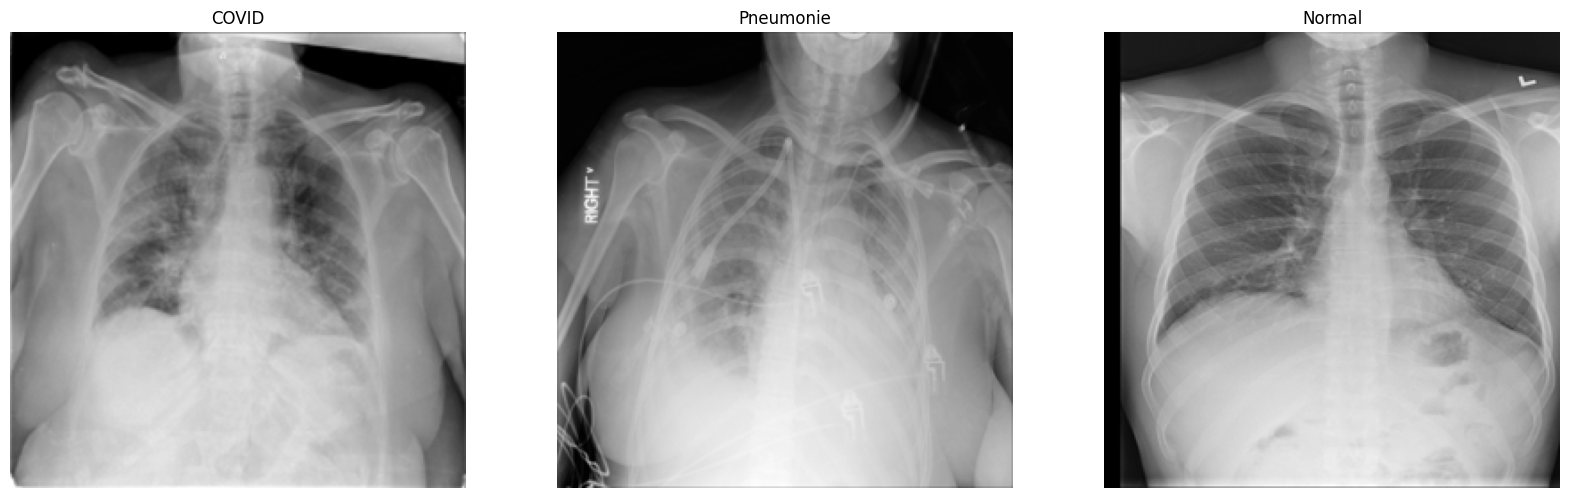

In [2]:
#dossier des images
path_data = '/kaggle/input/covidqu/Lung Segmentation Data/Lung Segmentation Data/'

#afficher exemples d'image des 3 catégories

plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
chemin_image = path_data + "Train/COVID-19/images/covid_1.png"  
image=imread(chemin_image) 
plt.imshow(image,cmap='gray') #par défaut le cmap n'est pas gris, donne l'impression que l'image est en couleur 
plt.axis('off')
plt.title("COVID")

plt.subplot(1,3,2)
chemin_image = path_data + "Train/Non-COVID/images/non_COVID (1).png"  
image=imread(chemin_image)
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.title("Pneumonie")

plt.subplot(1,3,3)
chemin_image = path_data + "Train/Normal/images/Normal (1407).png"  
image=imread(chemin_image)
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.title("Normal");

* L'image COVID a beaucoup de tâches blanches dans les poumons.
* L'image Pneumonie a presque les poumons tout blanc.
* L'image Normal a des poumons bien distincts, on voit des ramifications blanches dedans avec des lignes très fines, plus fines que sur l'image COVID.
* A première vue, une des méthodes serait d'apprendre au modèle à isoler la partie des poumons et à regarder l'intérieur.

In [3]:
#Combien y-a-t-il d'images dans chaque set ?
#toutes les images sont au format png

# Compter les fichiers avec les extensions d'image
extensions_images = [".png"]

# Chemin vers le dossier contenant les images
dossier = Path(path_data + "Train/COVID-19/images/")
train_COVID = sum(1 for f in dossier.iterdir() if f.suffix.lower() in extensions_images)
print(f"Le dossier train_COVID contient {train_COVID} images.")

dossier = Path(path_data + "Train/Non-COVID/images/")
train_Pneumonie = sum(1 for f in dossier.iterdir() if f.suffix.lower() in extensions_images)
print(f"Le dossier train_Pneumonie contient {train_Pneumonie} images.")

dossier = Path(path_data + "Train/Normal/images/")
train_Normal = sum(1 for f in dossier.iterdir() if f.suffix.lower() in extensions_images)
print(f"Le dossier train_Normal contient {train_Normal} images.")

print("" )
dossier = Path(path_data + "Test/COVID-19/images/")
test_COVID = sum(1 for f in dossier.iterdir() if f.suffix.lower() in extensions_images)
print(f"Le dossier test_COVID contient {test_COVID} images.")

dossier = Path(path_data + "Test/Non-COVID/images/")
test_Pneumonie = sum(1 for f in dossier.iterdir() if f.suffix.lower() in extensions_images)
print(f"Le dossier test_Pneumonie contient {test_Pneumonie} images.")

dossier = Path(path_data + "Test/Normal/images/")
test_Normal = sum(1 for f in dossier.iterdir() if f.suffix.lower() in extensions_images)
print(f"Le dossier test_Normal contient {test_Normal} images.")

print("" )
dossier = Path(path_data + "Val/COVID-19/images/")
val_COVID = sum(1 for f in dossier.iterdir() if f.suffix.lower() in extensions_images)
print(f"Le dossier val_COVID contient {val_COVID} images.")

dossier = Path(path_data + "Val/Non-COVID/images/")
val_Pneumonie = sum(1 for f in dossier.iterdir() if f.suffix.lower() in extensions_images)
print(f"Le dossier val_Pneumonie contient {val_Pneumonie} images.")

dossier = Path(path_data + "Val/Normal/images/")
val_Normal = sum(1 for f in dossier.iterdir() if f.suffix.lower() in extensions_images)
print(f"Le dossier val_Normal contient {val_Normal} images.")
print("" )

total_COVID = train_COVID + test_COVID + val_COVID
total_Pneumonie = train_Pneumonie + test_Pneumonie + val_Pneumonie
total_Normal = train_Normal + test_Normal + val_Normal

print(f"Nombre total d'images COVID {total_COVID} images.")
print(f"Nombre total d'images Pneumonie {total_Pneumonie} images.")
print(f"Nombre total d'images Normal {total_Normal} images.")


Le dossier train_COVID contient 7658 images.
Le dossier train_Pneumonie contient 7208 images.
Le dossier train_Normal contient 6849 images.

Le dossier test_COVID contient 2395 images.
Le dossier test_Pneumonie contient 2253 images.
Le dossier test_Normal contient 2140 images.

Le dossier val_COVID contient 1903 images.
Le dossier val_Pneumonie contient 1802 images.
Le dossier val_Normal contient 1712 images.

Nombre total d'images COVID 11956 images.
Nombre total d'images Pneumonie 11263 images.
Nombre total d'images Normal 10701 images.


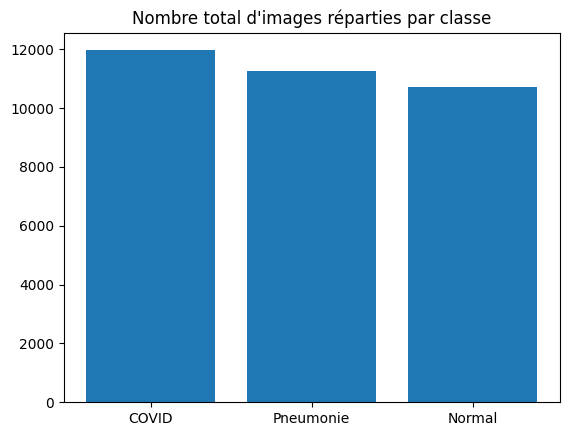

In [4]:
#Représentation graphique

total = [total_COVID,total_Pneumonie,total_Normal]
classes = ['COVID', 'Pneumonie', 'Normal']

plt.bar(classes,total)
plt.title("Nombre total d'images réparties par classe");

Les 3 classes ou 3 catégories sont bien réparties, il n'y a pas de déséquilibre entre elles.

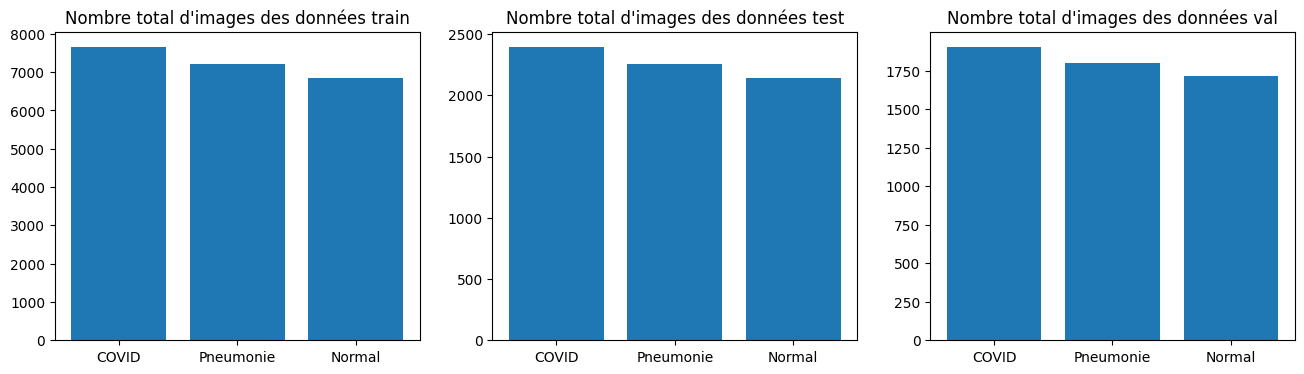

In [5]:
train = [train_COVID,train_Pneumonie,train_Normal]
test = [test_COVID,test_Pneumonie,test_Normal]
val = [val_COVID,val_Pneumonie,val_Normal]

plt.figure(figsize=(16,4))
plt.subplot(131)
plt.bar(classes,train)
plt.title("Nombre total d'images des données train");

plt.subplot(132)
plt.bar(classes,test)
plt.title("Nombre total d'images des données test");

plt.subplot(133)
plt.bar(classes,val)
plt.title("Nombre total d'images des données val");


La répartition des classes entre les 3 ensembles de données est identique (le rapport des images COVID, Pneumonie et Normal est identique entre les jeux de données train, test et val).
La répartition équilibrée des classes dans ce dataset est un avantage pour l'entraînement du modèle, car elle diminue les risques de biais en faveur d’une classe spécifique. 

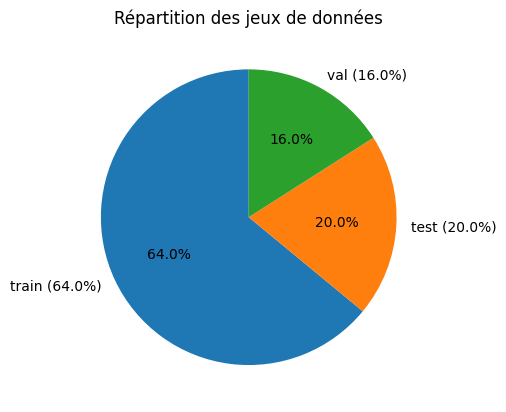

In [6]:
#représentation graphique

total_train = train_COVID + train_Pneumonie + train_Normal
total_test = test_COVID + test_Pneumonie + test_Normal
total_val = val_COVID + val_Pneumonie + val_Normal

total = total_train + total_test + total_val
#print("% des données train :" , round(total_train/total*100,0),'%')
#print("% des données test :" , round(total_test/total*100,0),'%')
#print("% des données val :" , round(total_val/total*100,0),'%')

# Calcul des pourcentages
pourcentages = [round(total_train / total * 100, 1), 
                round(total_test / total * 100, 1), 
                round(total_val / total * 100, 1)]


# Graphique camembert avec les pourcentages
plt.pie([total_train, total_test, total_val], 
        labels=[f'train ({pourcentages[0]}%)', 
                f'test ({pourcentages[1]}%)', 
                f'val ({pourcentages[2]}%)'], 
        autopct='%1.1f%%', startangle=90)
plt.title("Répartition des jeux de données")
plt.show()



In [7]:
#test d'analyse d'image

chemin_image = path_data + "Train/COVID-19/images/covid_1.png"  
image = imread(chemin_image)
print(image.shape) 

#retourne (256,256)
#une image est un tableau de 256 pixels par 256 pixels
#dimensions en noir et blanc car que 2 valeurs

(256, 256)


* La taille de l'image est (256,256).
* L'image est donc un tableau de 256 pixels par 256 pixels.
* C'est une image en noir et blanc car il n'y a que 2 dimensions.

In [8]:
#regarder si les images ont toutes la même taille (256,256)
#Test avec ce code sur plusieurs dossiers, OK toutes les images font (256,256)

from PIL import Image

# Chemin vers le dossier contenant les images
dossier = Path(path_data + "Train/COVID-19/images/")

# Variables pour compter et vérifier les tailles
total_images = 0
images_correctes = 0
images_incorrectes = []

# Parcours des fichiers dans le dossier
for fichier in dossier.iterdir():
    if fichier.suffix.lower() in extensions_images:  # Vérifie l'extension
        total_images += 1  # Compte le fichier
        try:
            with Image.open(fichier) as img:
                if img.size == (256, 256):
                    images_correctes += 1
                else:
                    images_incorrectes.append((fichier.name, img.size))
        except Exception as e:
            print(f"Erreur en lisant le fichier {fichier.name} : {e}")

# Résultats
print(f"Le dossier Train COVID contient {total_images} images.")
print(f"Nombre d'images avec la taille correcte (256, 256) : {images_correctes}")
if images_incorrectes:
    print("Les images suivantes ne respectent pas les dimensions (256, 256) :")
    for nom, taille in images_incorrectes:
        print(f"- {nom} avec une taille de {taille}")


Le dossier Train COVID contient 7658 images.
Nombre d'images avec la taille correcte (256, 256) : 7658


In [9]:
image_path = path_data + "Train/COVID-19/images/covid_1.png"

image = imread(image_path)
print(image)

[[118  16   0 ... 173 177 129]
 [121  16   0 ... 244 235 167]
 [ 78  11   0 ... 233 246 172]
 ...
 [255 255 199 ...  92 128 161]
 [255 255 232 ... 101 159 174]
 [255 255 249 ... 141 216 174]]


* une image est un tableau de 256*256
* chaque valeur à l'intérieur correspond à un pixel
* un pixel équivaut à un niveau de gris
* si le pixel=0 alors c'est noir
* si le pixel=255 alors c'est blanc


A première vue, les images semblent toutes exploitables.
Cependant en regardant plus en détail et d'après cet article (https://link.springer.com/article/10.1007/s13755-021-00146-8) il y aurait des doublons car le data set provient de plusieurs sources de données.
Comment éliminer les images en double ?
Certaines images semblent aussi difficilement exploitables (différence de taille et de luminosité)


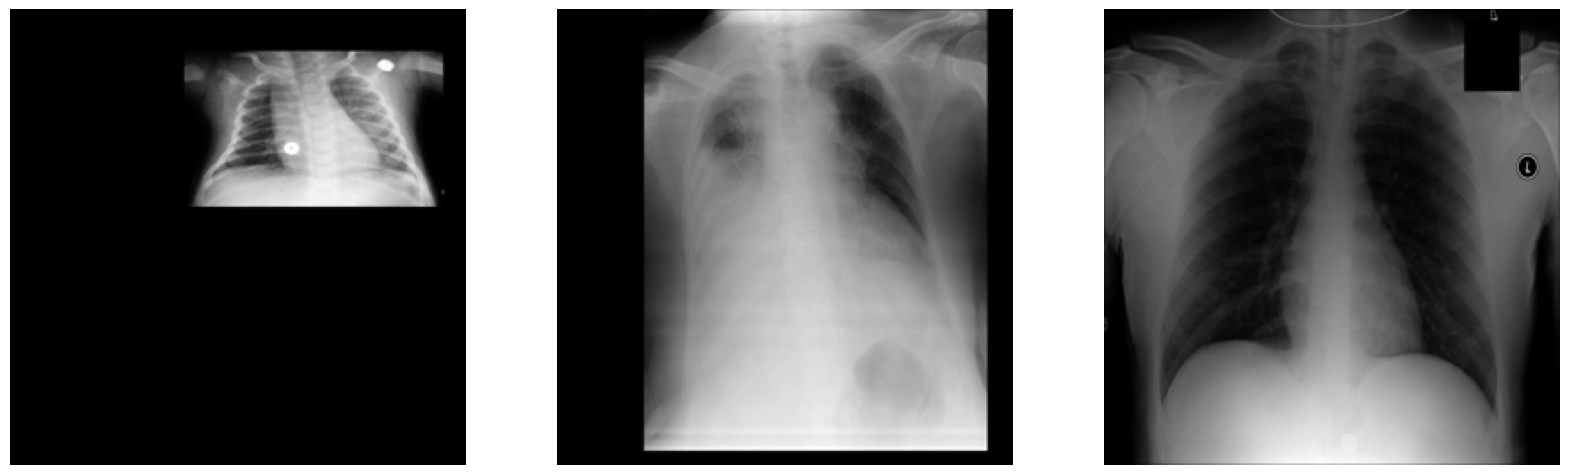

In [10]:
#Exemple des différences de qualité entre les images

plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
chemin_image = path_data + "Train/COVID-19/images/covid_3297.png"  
image=imread(chemin_image) 
plt.imshow(image,cmap='gray') #par défaut le cmap n'est pas gris, donne l'impression que l'image est en couleur 
plt.axis('off')

plt.subplot(1,3,2)
chemin_image = path_data + "Train/COVID-19/images/sub-S10348_ses-E17920_run-1_bp-chest_vp-ap_cr.png"
image=imread(chemin_image)
plt.imshow(image,cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
chemin_image = path_data + "Train/Normal/images/Normal (5220).png"  
image=imread(chemin_image)
plt.imshow(image,cmap='gray')
plt.axis('off');


Problématique :
Comment éliminer les images en double et celles inexploitables ?

    * Analyse de la taille des fichiers

In [11]:
# on récupère l'ensemble des images pour chaque classe 
def fill_size_data(path):
    data = []
    for file in os.listdir(path):
        if not file.startswith("."):
            file_path = os.path.join(path, file)
            if os.path.isfile(file_path):
                size = os.path.getsize(file_path)
                image = cv2.imread(file_path)
                laplacian_var = cv2.Laplacian(image, cv2.CV_64F).var()
                data.append({"Fichier": file, "Taille": size, "Laplacienne": laplacian_var})
    return data


normal_path = path_data + "Train/Normal/images/"
normal_data = fill_size_data(normal_path)
normal_path = path_data + "Val/Normal/images/"
normal_data += fill_size_data(normal_path)
normal_path = path_data + "Test/Normal/images/"
normal_data += fill_size_data(normal_path)
noncovid_path = path_data + "Train/Non-COVID/images/"
noncovid_data = fill_size_data(noncovid_path)
noncovid_path = path_data + "Val/Non-COVID/images/"
noncovid_data += fill_size_data(noncovid_path)
noncovid_path = path_data + "Test/Non-COVID/images/"
noncovid_data += fill_size_data(noncovid_path)
covid_path = path_data + "Train/COVID-19/images/"
covid_data = fill_size_data(covid_path)
covid_path = path_data + "Val/COVID-19/images/"
covid_data += fill_size_data(covid_path)
covid_path = path_data + "Test/COVID-19/images/"
covid_data += fill_size_data(covid_path)


df_normal = pd.DataFrame(normal_data)
df_noncovid = pd.DataFrame(noncovid_data)
df_covid = pd.DataFrame(covid_data)

# On vérifie qu'on a bien tous les images 
print(df_normal.shape)
print(df_noncovid.shape)
print(df_covid.shape)

(10701, 3)
(11263, 3)
(11956, 3)


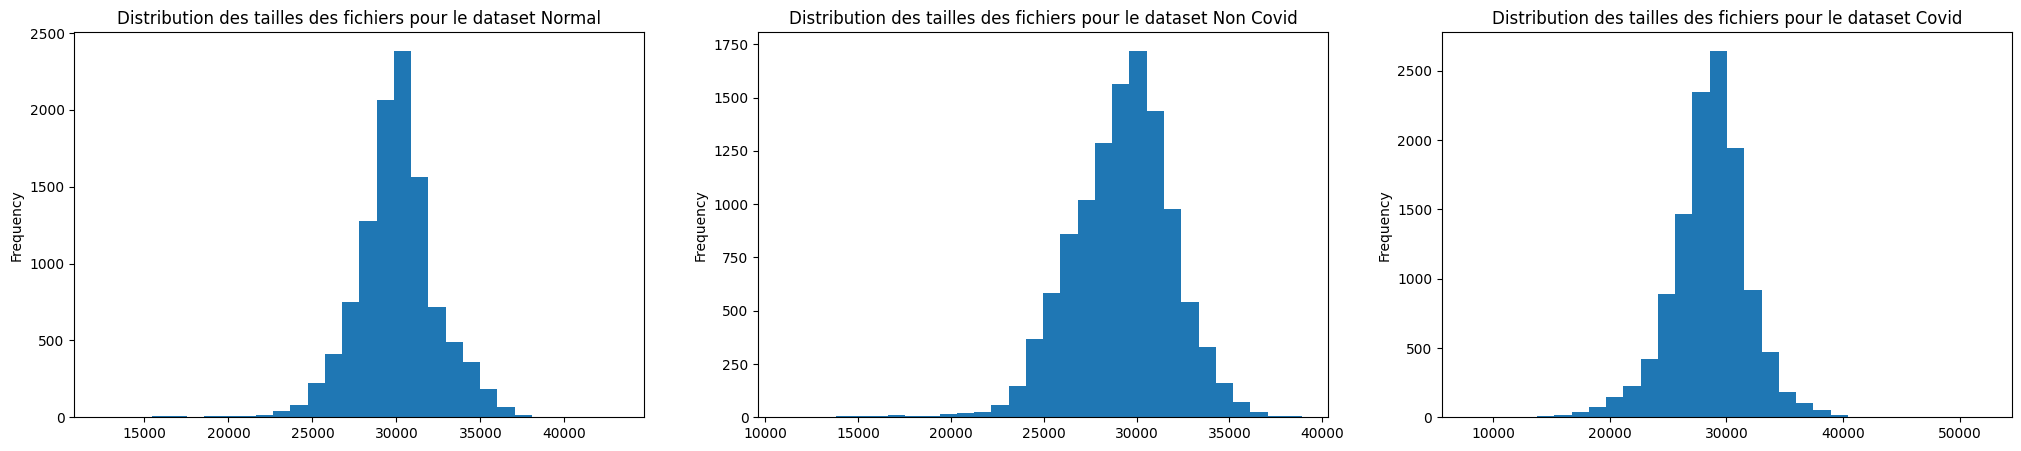

In [12]:
# on affiche la distribution 
fig, axes = plt.subplots(1, 3, figsize=(25, 5))

df_normal['Taille'].plot(kind='hist', bins=30, title='Distribution des tailles des fichiers pour le dataset Normal', ax=axes[0])
df_noncovid['Taille'].plot(kind='hist', bins=30, title='Distribution des tailles des fichiers pour le dataset Non Covid', ax=axes[1])
df_covid['Taille'].plot(kind='hist', bins=30, title='Distribution des tailles des fichiers pour le dataset Covid', ax=axes[2]);

L'ensemble de la taille des images suit une loi normale autour de 30 kilo-octet. 

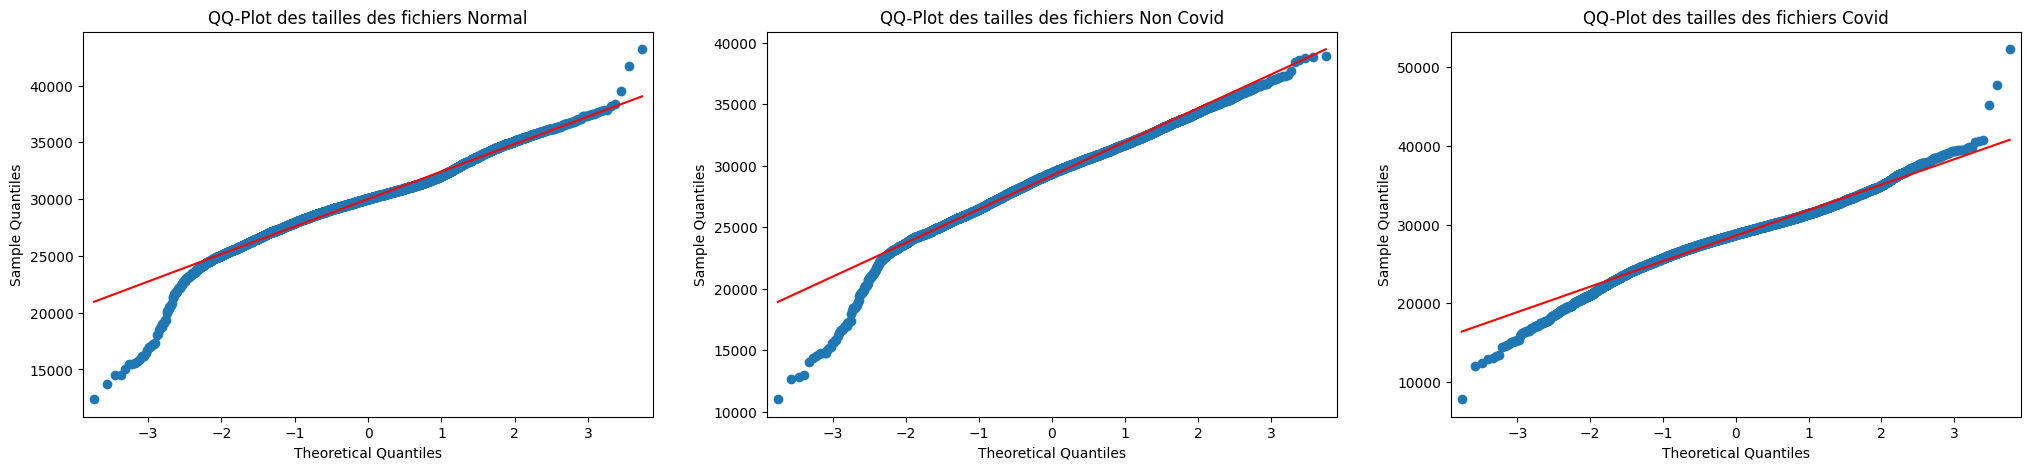

In [13]:
# tracer le qq plot pour vérifier l'hypothèse de normalité
fig, axes = plt.subplots(1, 3, figsize=(25, 5))
sm.qqplot(df_normal['Taille'], line='s', ax=axes[0])  
axes[0].set_title("QQ-Plot des tailles des fichiers Normal")
sm.qqplot(df_noncovid['Taille'], line='s', ax=axes[1])  
axes[1].set_title("QQ-Plot des tailles des fichiers Non Covid")
sm.qqplot(df_covid['Taille'], line='s', ax=axes[2])  
axes[2].set_title("QQ-Plot des tailles des fichiers Covid")
plt.show()

In [14]:
# Afficher les images avec la taille min et max

ligne_min = df_normal.loc[df_normal.Taille.idxmin()]
print(ligne_min.Fichier)

ligne_max = df_normal.loc[df_normal.Taille.idxmax()]
print(ligne_max.Fichier)

ligne_min = df_noncovid.loc[df_noncovid.Taille.idxmin()]
print(ligne_min.Fichier)

ligne_max = df_noncovid.loc[df_noncovid.Taille.idxmax()]
print(ligne_max.Fichier)

ligne_min = df_covid.loc[df_covid.Taille.idxmin()]
print(ligne_min.Fichier)

ligne_max = df_covid.loc[df_covid.Taille.idxmax()]
print(ligne_max.Fichier)


Normal (10271).png
Normal (4324).png
non_COVID (1839).png
non_COVID (8768).png
covid_3297.png
covid_4203.png


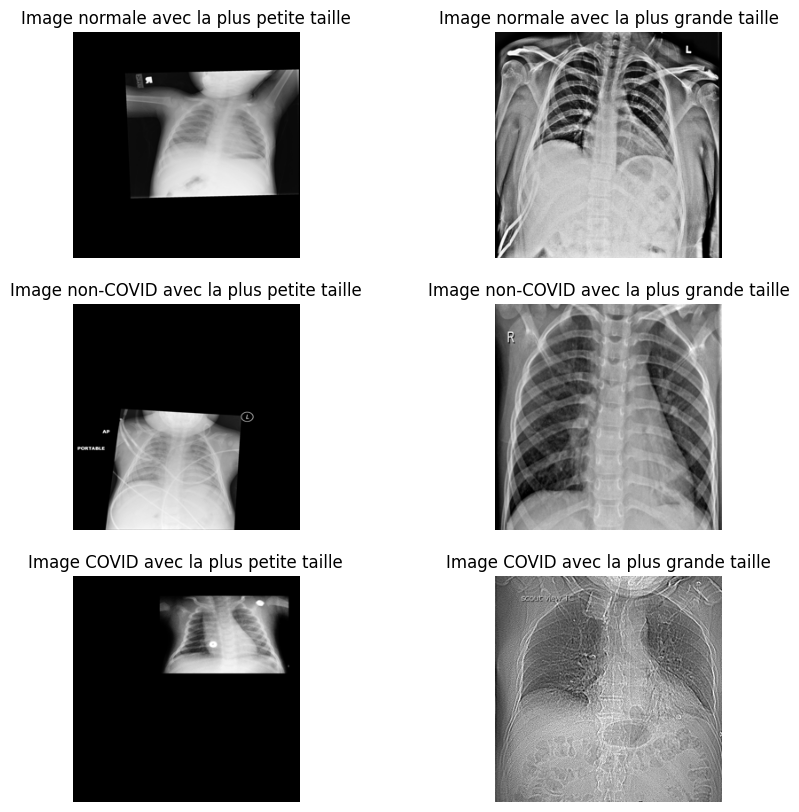

In [15]:
#Affichage des images 

plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
chemin_image = path_data + "Val/Normal/images/Normal (10271).png"  
image=imread(chemin_image)
plt.imshow(image,cmap='gray')
plt.title('Image normale avec la plus petite taille')
plt.axis('off');

plt.subplot(3,2,2)
chemin_image = path_data + "Train/Normal/images/Normal (4324).png"  
image=imread(chemin_image)
plt.imshow(image,cmap='gray')
plt.title('Image normale avec la plus grande taille')
plt.axis('off');


plt.subplot(3,2,3)
chemin_image = path_data + "Train/Non-COVID/images/non_COVID (1839).png"  
image=imread(chemin_image)
plt.imshow(image,cmap='gray')
plt.title('Image non-COVID avec la plus petite taille')
plt.axis('off');

plt.subplot(3,2,4)
chemin_image = path_data + "Train/Non-COVID/images/non_COVID (8768).png"  
image=imread(chemin_image)
plt.imshow(image,cmap='gray')
plt.title('Image non-COVID avec la plus grande taille')
plt.axis('off');


plt.subplot(3,2,5)
chemin_image = path_data + "Train/COVID-19/images/covid_3297.png"  
image=imread(chemin_image)
plt.imshow(image,cmap='gray')
plt.title('Image COVID avec la plus petite taille')
plt.axis('off');

plt.subplot(3,2,6)
chemin_image = path_data + "Train/COVID-19/images/covid_4203.png"  
image=imread(chemin_image)
plt.imshow(image,cmap='gray')
plt.title('Image COVID avec la plus grande taille')
plt.axis('off');

La taille des images est une indication sur sa qualité. Si la taille de l'image est trop petite, l'image est réduite et nous avons moins de détails par rapport aux autres images, ce qui peut fausser le modèle.

    * Etude de la netteté de l'image

La variance du filtre de Laplace permet de déterminer la netteté de l'image et de détecter si les images sont floues.
Une image nette aura une variance Laplacienne élevée par rapport à une image floue.

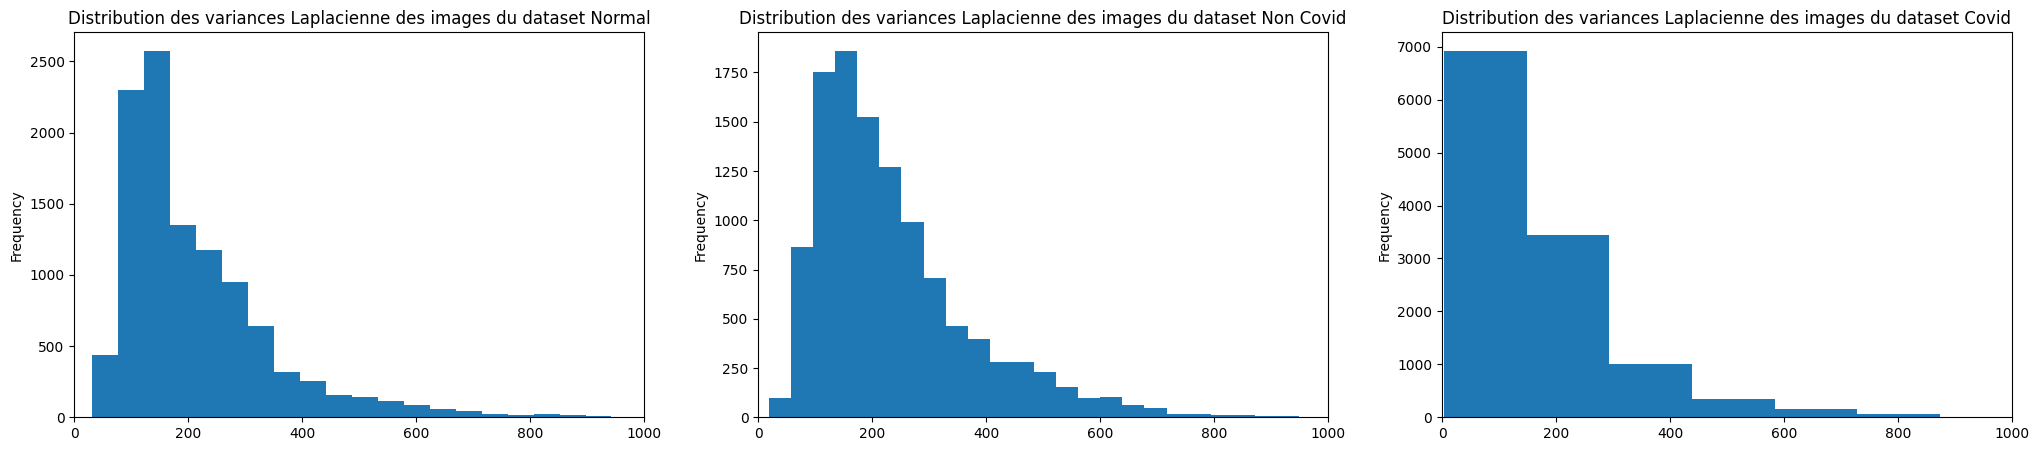

In [16]:
# on affiche la distribution 
fig, axes = plt.subplots(1, 3, figsize=(25, 5))

df_normal['Laplacienne'].plot(kind='hist', bins=30, title='Distribution des variances Laplacienne des images du dataset Normal', ax=axes[0], xlim=[0, 1000])
df_noncovid['Laplacienne'].plot(kind='hist', bins=30, title='Distribution des variances Laplacienne des images du dataset Non Covid', ax=axes[1], xlim=[0, 1000])
df_covid['Laplacienne'].plot(kind='hist', bins=30, title='Distribution des variances Laplacienne des images du dataset Covid', ax=axes[2], xlim=[0, 1000]);

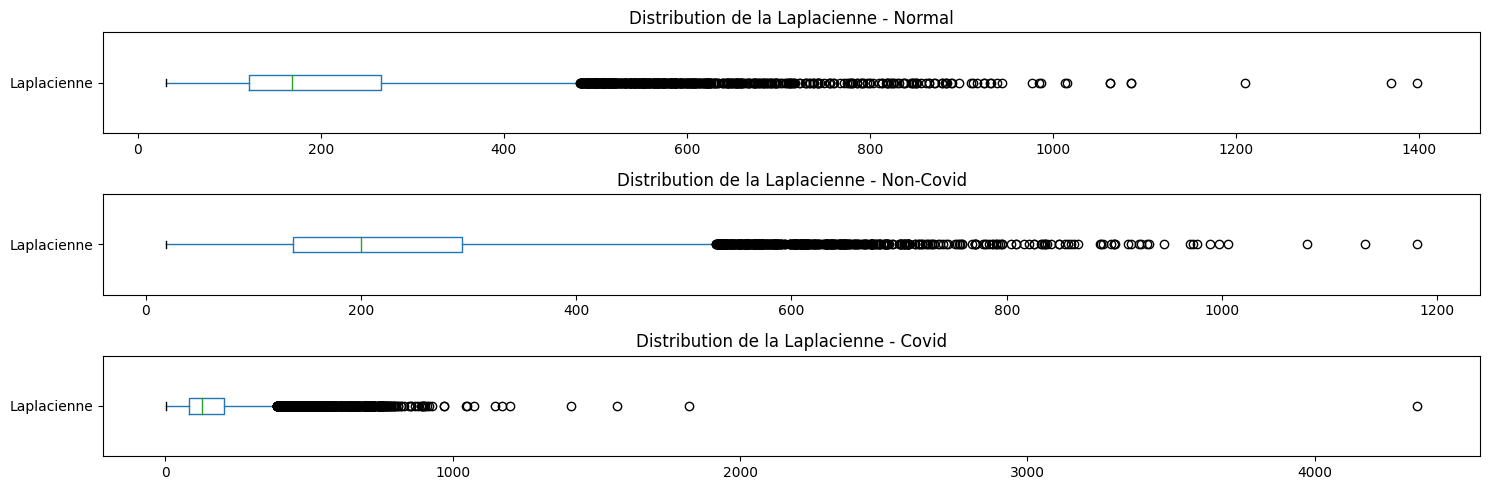

In [17]:
# on affiche les boxplots
fig, axes = plt.subplots(3, 1, figsize=(15, 5))

df_normal.boxplot(column=["Laplacienne"], grid=False, ax=axes[0], vert=False)
axes[0].set_title("Distribution de la Laplacienne - Normal")

df_noncovid.boxplot(column=["Laplacienne"], grid=False, ax=axes[1], vert=False)
axes[1].set_title("Distribution de la Laplacienne - Non-Covid")

df_covid.boxplot(column=["Laplacienne"], grid=False, ax=axes[2], vert=False);
axes[2].set_title("Distribution de la Laplacienne - Covid")

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

Les images de type COVID sont beaucoup plus nombreuses (environ 7000) à avoir une variance Laplacienne <200 par rapport aux autres classes. Elles sont donc moins nettes que la classe Normal et Pneumonie. Cela pourrait s'expliquer par le fait que le COVID crée des tâches blanchâtre sur la radiographie, ce qui donne un aspect "flouté".

    * Analyse des intensités des pixels :

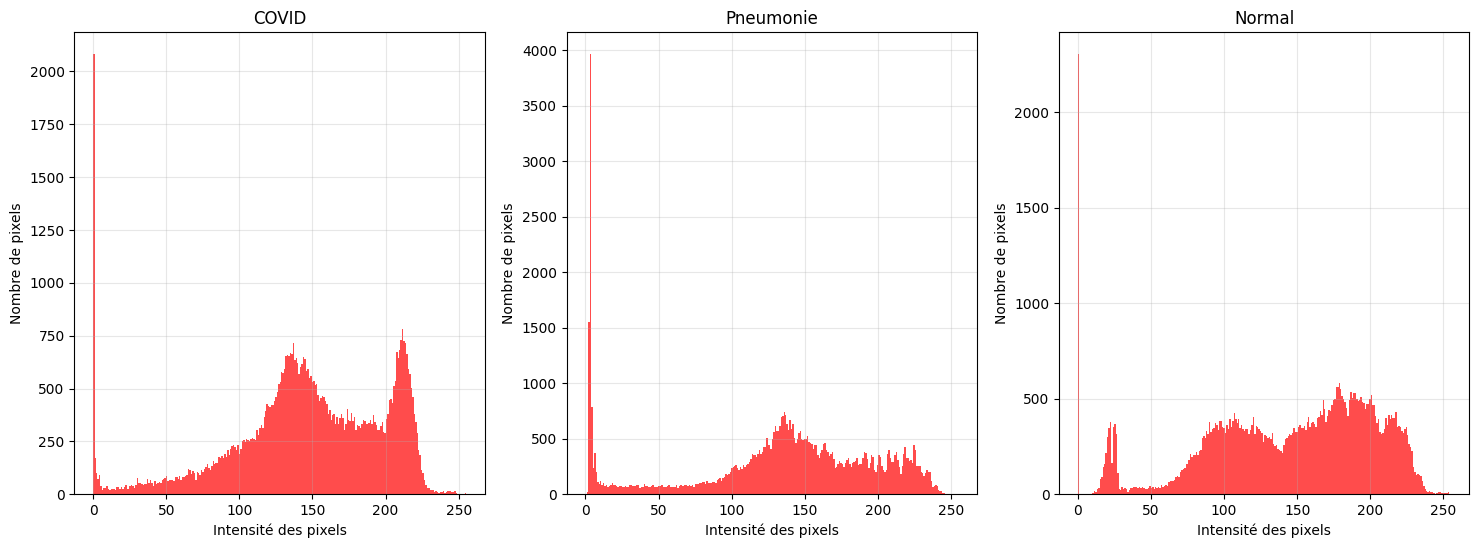

In [18]:
from PIL import Image

#afficher exemples d'image des 3 catégories
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
# Calculer l'histogramme des intensités de pixels COVID
chemin_image = path_data + "Train/COVID-19/images/covid_1.png"
img = Image.open(chemin_image).convert('L')
img_array = np.array(img)
plt.hist(img_array.ravel(), bins=256, range=(0, 255), color='red', alpha=0.7)
plt.title("COVID")
plt.xlabel("Intensité des pixels")
plt.ylabel("Nombre de pixels")
plt.grid(True, alpha=0.3)
plt.subplot(1,3,2)
# Calculer l'histogramme des intensités de pixels Pneumonie
chemin_image = path_data + "Train/Non-COVID/images/non_COVID (1).png"
img = Image.open(chemin_image).convert('L')
img_array = np.array(img)
plt.hist(img_array.ravel(), bins=256, range=(0, 255), color='red', alpha=0.7)
plt.title("Pneumonie")
plt.xlabel("Intensité des pixels")
plt.ylabel("Nombre de pixels")
plt.grid(True, alpha=0.3)
plt.subplot(1,3,3)
# Calculer l'histogramme des intensités de pixels Normal
chemin_image = path_data + "Train/Normal/images/Normal (1407).png"
img = Image.open(chemin_image).convert('L')
img_array = np.array(img)
plt.hist(img_array.ravel(), bins=256, range=(0, 255), color='red', alpha=0.7)
plt.title("Normal")
plt.xlabel("Intensité des pixels")
plt.ylabel("Nombre de pixels")
plt.grid(True, alpha=0.3)
plt.show();

- COVID :
Beaucoup de pixels très sombres (intensité proche de 0), ce qui montre des zones sombres importantes.
Les autres pixels sont répartis dans les tons moyens (100-200).
- Pneumonie :
Encore plus de pixels sombres que dans COVID.
Un pic clair autour des tons moyens (150-200), montrant des zones lumineuses.
- Normal :
Les pixels sont mieux répartis, avec moins de zones très sombres.
Une répartition équilibrée entre les tons moyens et clairs (100-200), ce qui reflète une structure homogène.
- En résumé :
Les images de COVID et Pneumonie ont beaucoup de zones sombres.
Les images normales montrent une répartition plus régulière des pixels, correspondant à des poumons sains.